# Word Embedding Analyses and Visualizations



# Data Prep

In [1]:
import gensim
import itertools
import numpy as np
import pandas
import random

#for the primary visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#for PCA visualization
from sklearn.decomposition import PCA


In [2]:
print(gensim.__version__)

4.3.0


In [3]:
def tuple_to_dict(mytuple):
    """
    Input a tuple, output a dictionary
    """
    
    mydict = {}
    for key, value in mytuple:
        if key not in mydict:
            mydict[key] = value
    return mydict

def add_ave_vec(mymodel, gender_list, race_list, new_word):
    """
    This function produces an average resultant vector from a word2vec model, 
    produced by averaging the sum of two vectors across all possible pairs from two word lists
    
    Input: a word2vec model, two synonym lists, and the label for the resultant vector
    Output: the resultant vector
    """
    
    mylist = []
    for e in itertools.product(gender_list, race_list):
        mylist.append((mymodel[e[0]] + mymodel[e[1]]))

    new_vec = ((np.add.reduce(mylist)) / len(mylist))
    return(new_vec)



In [4]:
#synonym lists to produce averaged social identity vectors
#Black and white men and women

women_syn = ['woman', 'women', 'girl', 'girls', 'she', 'her', 'hers', 'herself']
men_syn = ['man', 'men', 'boy', 'boys', 'he', 'him', 'his', 'himself']

black_syn = ['black', 'colored', 'coloured', 'negro', 'negress', 'negros', 'afroamerican']
white_syn = ['white', 'caucasian', 'anglosaxon']

#Create 4x6 lists, the mean cosine similarity between each pairwise social identity x social institution
blackwomen_culture_list = []
whitewomen_culture_list = []
blackmen_culture_list = []
whitemen_culture_list = []

blackwomen_domestic_list = []
whitewomen_domestic_list = []
blackmen_domestic_list = []
whitemen_domestic_list = []

blackwomen_economy_list = []
whitewomen_economy_list = []
blackmen_economy_list = []
whitemen_economy_list = []

blackwomen_polity_list = []
whitewomen_polity_list = []
blackmen_polity_list = []
whitemen_polity_list = []

blackwomen_authority_list = []
whitewomen_authority_list = []
blackmen_authority_list = []
whitemen_authority_list = []

#Construct the cosine similarity for the primary variables, rom the primary model

model = gensim.models.KeyedVectors.load_word2vec_format('../data/word2vec_all_clean.txt')

count = len(list(model.index_to_key))
n = 50

#add social identity vector to the main model

blackwomen_vec = add_ave_vec(model, women_syn, black_syn, 'blackwomen')
whitewomen_vec = add_ave_vec(model, women_syn, white_syn, 'whitewomen')
blackmen_vec = add_ave_vec(model, men_syn, black_syn, 'blackmen')
whitemen_vec = add_ave_vec(model, men_syn, white_syn, 'whitemen')

women_syn = ['woman', 'women', 'girl', 'girls', 'she', 'her', 'hers', 'herself']
men_syn = ['man', 'men', 'boy', 'boys', 'he', 'him', 'his', 'himself']

women_vec = (model['woman'] + model['women'] + model['girl'] + model['girls'] + model['she'] + model['her'] + model['hers'] + model['herself']) / len(women_syn)

men_vec = (model['man'] + model['men'] + model['boy'] + model['boys'] + model['he'] + model['him'] + model['his'] + model['himself']) / len(men_syn)

#clear cached index for main model
model.vectors_norm = None

#50 words with highest cosine similarity to the five social institutions

polity = model.most_similar(['nation', 'state'], topn=count)
polity_dict = tuple_to_dict(polity)
polity_words = [word for word, score in polity][:n]

economy = model.most_similar(['money'], topn=count)
economy_dict = tuple_to_dict(economy)
economy_words = [word for word, score in economy][:n]

culture = model.most_similar(['culture'], topn=count)
culture_dict = tuple_to_dict(culture)
culture_words = [word for word, score in culture][:n]

domestic = model.most_similar(['housework', 'children'], topn=count)
domestic_dict = tuple_to_dict(domestic)
domestic_words = [word for word, score in domestic][:n]


#calculate cosine similarity between all vectors and the four social identity vectors

white_woman = model.most_similar(whitewomen_vec, topn=count)
white_woman_dict = tuple_to_dict(white_woman)
white_woman_words = [word for word, score in white_woman][:n]

black_woman = model.most_similar(blackwomen_vec, topn=count)
black_woman_dict = tuple_to_dict(black_woman)
black_woman_words = [word for word, score in black_woman][:n]

black_man = model.most_similar(blackmen_vec, topn=count)
black_man_dict = tuple_to_dict(black_man)
black_man_words = [word for word, score in black_man][:n]

white_man = model.most_similar(whitemen_vec, topn=count)
white_man_dict = tuple_to_dict(white_man)
white_man_words = [word for word, score in white_man][:n]

WOMAN = model.most_similar(women_vec, topn=count)
WOMAN_dict = tuple_to_dict(WOMAN)
WOMAN_words = [word for word, score in WOMAN][:n]

MAN = model.most_similar(men_vec, topn=count)
MAN_dict = tuple_to_dict(MAN)
MAN_words = [word for word, score in MAN][:n]

#calculate average consine similarity between 4 social identities x 5 social institutions
ww_polity = np.mean([white_woman_dict[word] for word in polity_words])
bw_polity = np.mean([black_woman_dict[word] for word in polity_words])
wm_polity = np.mean([white_man_dict[word] for word in polity_words])
bm_polity = np.mean([black_man_dict[word] for word in polity_words])

ww_economy = np.mean([white_woman_dict[word] for word in economy_words])
bw_economy = np.mean([black_woman_dict[word] for word in economy_words])
wm_economy = np.mean([white_man_dict[word] for word in economy_words])
bm_economy = np.mean([black_man_dict[word] for word in economy_words])

ww_culture = np.mean([white_woman_dict[word] for word in culture_words])
bw_culture = np.mean([black_woman_dict[word] for word in culture_words])
wm_culture = np.mean([white_man_dict[word] for word in culture_words])
bm_culture = np.mean([black_man_dict[word] for word in culture_words])

ww_domestic = np.mean([white_woman_dict[word] for word in domestic_words])
bw_domestic = np.mean([black_woman_dict[word] for word in domestic_words])
wm_domestic = np.mean([white_man_dict[word] for word in domestic_words])
bm_domestic = np.mean([black_man_dict[word] for word in domestic_words])

master_dict = {}
master_dict['polity'] = polity_dict
master_dict['economy'] = economy_dict
master_dict['domestic'] = domestic_dict
master_dict['culture'] = culture_dict

master_dict_gender = {}
master_dict_gender['polity'] = polity_dict
master_dict_gender['economy'] = economy_dict
master_dict_gender['domestic'] = domestic_dict
master_dict_gender['culture'] = culture_dict


df = pandas.DataFrame(master_dict)

df_gender = pandas.DataFrame(master_dict_gender)

df[''] = ''

#domains of power

for word in polity_words:
    df.loc[word, ''] = 'Polity Words'

for word in economy_words:
    df.loc[word, ''] = 'Economy Words'
    
for word in culture_words:
    df.loc[word, ''] = 'Culture Words'
    
for word in domestic_words:
    df.loc[word, ''] = 'Domestic Words'
    
#gendered domains
    
for word in polity_words:
    df_gender.loc[word, ''] = 'Polity Words'

for word in economy_words:
    df_gender.loc[word, ''] = 'Economy Words'
    
for word in culture_words:
    df_gender.loc[word, ''] = 'Culture Words'
    
for word in domestic_words:
    df_gender.loc[word, ''] = 'Domestic Words'
    
    
################
####culture#####
################

bw_ww_culture = []
for idx, value in enumerate(whitewomen_culture_list):
    bw_ww_culture.append(value-blackwomen_culture_list[idx])
    
bw_wm_culture = []
for idx, value in enumerate(whitemen_culture_list):
    bw_wm_culture.append(value-blackwomen_culture_list[idx])
    
bw_bm_culture = []
for idx, value in enumerate(blackmen_culture_list):
    bw_bm_culture.append(value-blackwomen_culture_list[idx])
    
bm_ww_culture = []
for idx, value in enumerate(whitewomen_culture_list):
    bm_ww_culture.append(value-blackmen_culture_list[idx])
    
ww_wm_culture = []
for idx, value in enumerate(whitemen_culture_list):
    ww_wm_culture.append(value-whitewomen_culture_list[idx])
    
bm_wm_culture = []
for idx, value in enumerate(whitemen_culture_list):
    bm_wm_culture.append(value-blackmen_culture_list[idx])

#Calculate difference in means for 40 models for the confidence interval

################
####polity######
################

bw_ww_polity = []
for idx, value in enumerate(whitewomen_polity_list):
    bw_ww_polity.append(value-blackwomen_polity_list[idx])
    
bw_wm_polity = []
for idx, value in enumerate(whitemen_polity_list):
    bw_wm_polity.append(value-blackwomen_polity_list[idx])
    
bw_bm_polity = []
for idx, value in enumerate(blackmen_polity_list):
    bw_bm_polity.append(value-blackwomen_polity_list[idx])
    
bm_ww_polity = []
for idx, value in enumerate(whitewomen_polity_list):
    bm_ww_polity.append(value-blackmen_polity_list[idx])
    
ww_wm_polity = []
for idx, value in enumerate(whitemen_polity_list):
    ww_wm_polity.append(value-whitewomen_polity_list[idx])
    
bm_wm_polity = []
for idx, value in enumerate(whitemen_polity_list):
    bm_wm_polity.append(value-blackmen_polity_list[idx])
    

##################
####domestic######
##################

bw_ww_domestic = []
for idx, value in enumerate(whitewomen_domestic_list):
    bw_ww_domestic.append(value-blackwomen_domestic_list[idx])
    
bw_wm_domestic = []
for idx, value in enumerate(whitemen_domestic_list):
    bw_wm_domestic.append(value-blackwomen_domestic_list[idx])
    
bw_bm_domestic = []
for idx, value in enumerate(blackmen_domestic_list):
    bw_bm_domestic.append(value-blackwomen_domestic_list[idx])
    
bm_ww_domestic = []
for idx, value in enumerate(whitewomen_domestic_list):
    bm_ww_domestic.append(value-blackmen_domestic_list[idx])
    
ww_wm_domestic = []
for idx, value in enumerate(whitemen_domestic_list):
    ww_wm_domestic.append(value-whitewomen_domestic_list[idx])
    
bm_wm_domestic = []
for idx, value in enumerate(whitemen_domestic_list):
    bm_wm_domestic.append(value-blackmen_domestic_list[idx])
    

##################
####economy#######
##################

bw_ww_economy = []
for idx, value in enumerate(whitewomen_economy_list):
    bw_ww_economy.append(value-blackwomen_economy_list[idx])
    
bw_wm_economy = []
for idx, value in enumerate(whitemen_economy_list):
    bw_wm_economy.append(value-blackwomen_economy_list[idx])
    
bw_bm_economy = []
for idx, value in enumerate(blackmen_economy_list):
    bw_bm_economy.append(value-blackwomen_economy_list[idx])
    
bm_ww_economy = []
for idx, value in enumerate(whitewomen_economy_list):
    bm_ww_economy.append(value-blackmen_economy_list[idx])
    
ww_wm_economy = []
for idx, value in enumerate(whitemen_economy_list):
    ww_wm_economy.append(value-whitewomen_economy_list[idx])
    
bm_wm_economy = []
for idx, value in enumerate(whitemen_economy_list):
    bm_wm_economy.append(value-blackmen_economy_list[idx])
  


# Figure 1. First two dimensions from a PCA of 476 words with highest cosine similarity to each of four institutions and six social categories

In [5]:
master_dict_ppsk = {}
master_dict_ppsk['polity'] = polity_dict
master_dict_ppsk['economy'] = economy_dict
master_dict_ppsk['domestic'] = domestic_dict
master_dict_ppsk['culture'] = culture_dict
master_dict_ppsk['blackwoman'] = black_woman_dict
master_dict_ppsk['blackman'] = black_man_dict
master_dict_ppsk['whitewoman'] = white_woman_dict
master_dict_ppsk['whiteman'] = white_man_dict
master_dict_ppsk['WOMAN'] = WOMAN_dict
master_dict_ppsk['MAN'] = MAN_dict

rows_ppsk = polity_words + economy_words + domestic_words + culture_words + black_woman_words + black_man_words + white_man_words + white_woman_words + WOMAN_words + MAN_words

df_ppsk = pandas.DataFrame(master_dict_ppsk)
df_ppsk = df_ppsk.loc[rows_ppsk]

df[''] = ''

#domains of power

for word in polity_words:
    df_ppsk.loc[word, ''] = 'Polity Words'

for word in economy_words:
    df_ppsk.loc[word, ''] = 'Economy Words'
    
for word in culture_words:
    df_ppsk.loc[word, ''] = 'Culture Words'
    
for word in domestic_words:
    df_ppsk.loc[word, ''] = 'Domestic Words'
    
for word in black_woman_words:
    df_ppsk.loc[word, ''] = 'Black Woman Words'
    
for word in black_man_words:
    df_ppsk.loc[word, ''] = 'Black Man Words'
    
for word in white_woman_words:
    df_ppsk.loc[word, ''] = 'White Woman Words'
    
for word in white_man_words:
    df_ppsk.loc[word, ''] = 'White Man Words'
    
for word in WOMAN_words:
    df_ppsk.loc[word, ''] = 'Woman Words'
    
for word in MAN_words:
    df_ppsk.loc[word, ''] = 'Man Words'
    
    

In [6]:
#take a peek
df_ppsk.head()

,polity,economy,domestic,culture,blackwoman,blackman,whitewoman,whiteman,WOMAN,MAN,
country,0.733046,0.330420,0.312101,0.339859,0.440670,0.494175,0.461042,0.514458,0.300960,0.410376,Polity Words
vassalage,0.714655,0.296304,0.318006,0.410114,0.481379,0.491949,0.490950,0.503589,0.318076,0.343313,Polity Words
commonwealth,0.709129,0.124770,0.171603,0.243886,0.421038,0.495737,0.326746,0.392967,0.211615,0.347061,Polity Words
municipalities,0.704126,0.312690,0.308872,0.371675,0.500971,0.550061,0.496372,0.544388,0.340597,0.442078,Polity Words
nonslaveholding,0.697312,0.224915,0.299552,0.353803,0.556251,0.618081,0.560379,0.621129,0.330652,0.448352,Polity Words


In [7]:
df_mds_ppsk = df_ppsk[['polity', 'culture', 'economy', 'domestic', 
                       'blackwoman', 'blackman', 'whitewoman', 'whiteman',
                       'WOMAN', 'MAN',
                       '']]
df_mds_ppsk['polity'] = 1 - df_mds_ppsk['polity']
df_mds_ppsk['culture'] = 1 - df_mds_ppsk['culture']
df_mds_ppsk['economy'] = 1 - df_mds_ppsk['economy']
df_mds_ppsk['domestic'] = 1 - df_mds_ppsk['domestic']
df_mds_ppsk['blackwoman'] = 1 - df_mds_ppsk['blackwoman']
df_mds_ppsk['blackman'] = 1 - df_mds_ppsk['blackman']
df_mds_ppsk['whitewoman'] = 1 - df_mds_ppsk['whitewoman']
df_mds_ppsk['whiteman'] = 1 - df_mds_ppsk['whiteman']
df_mds_ppsk['WOMAN'] = 1 - df_mds_ppsk['WOMAN']
df_mds_ppsk['MAN'] = 1 - df_mds_ppsk['MAN']
feat_cols_ppsk = ['polity', 'culture', 'economy', 'domestic', 
                  'blackwoman', 'blackman', 'whitewoman', 'whiteman',
                 'WOMAN', 'MAN']

np.random.seed(42)
rndperm = np.random.permutation(df_mds_ppsk.shape[0])

In [8]:
pca_ppsk = PCA(n_components=3)
pca_result_ppsk = pca_ppsk.fit_transform(df_mds_ppsk[feat_cols_ppsk].values)
df_mds_ppsk['pcaone'] = pca_result_ppsk[:,0]
df_mds_ppsk['pcatwo'] = pca_result_ppsk[:,1] 
df_mds_ppsk['pcathree'] = pca_result_ppsk[:,2]
vp_df = df_mds_ppsk[['', 'pcatwo']][df_mds_ppsk[''].isin(['Polity Words', 'Culture Words', 'Domestic Words', 'Economy Words'])]
print('Explained variation per principal component: {}'.format(pca_ppsk.explained_variance_ratio_))

Explained variation per principal component: [0.41663037 0.30158913 0.1322561 ]


/tmp/ipykernel_183202/336220716.py:16: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  fig = sns.scatterplot(


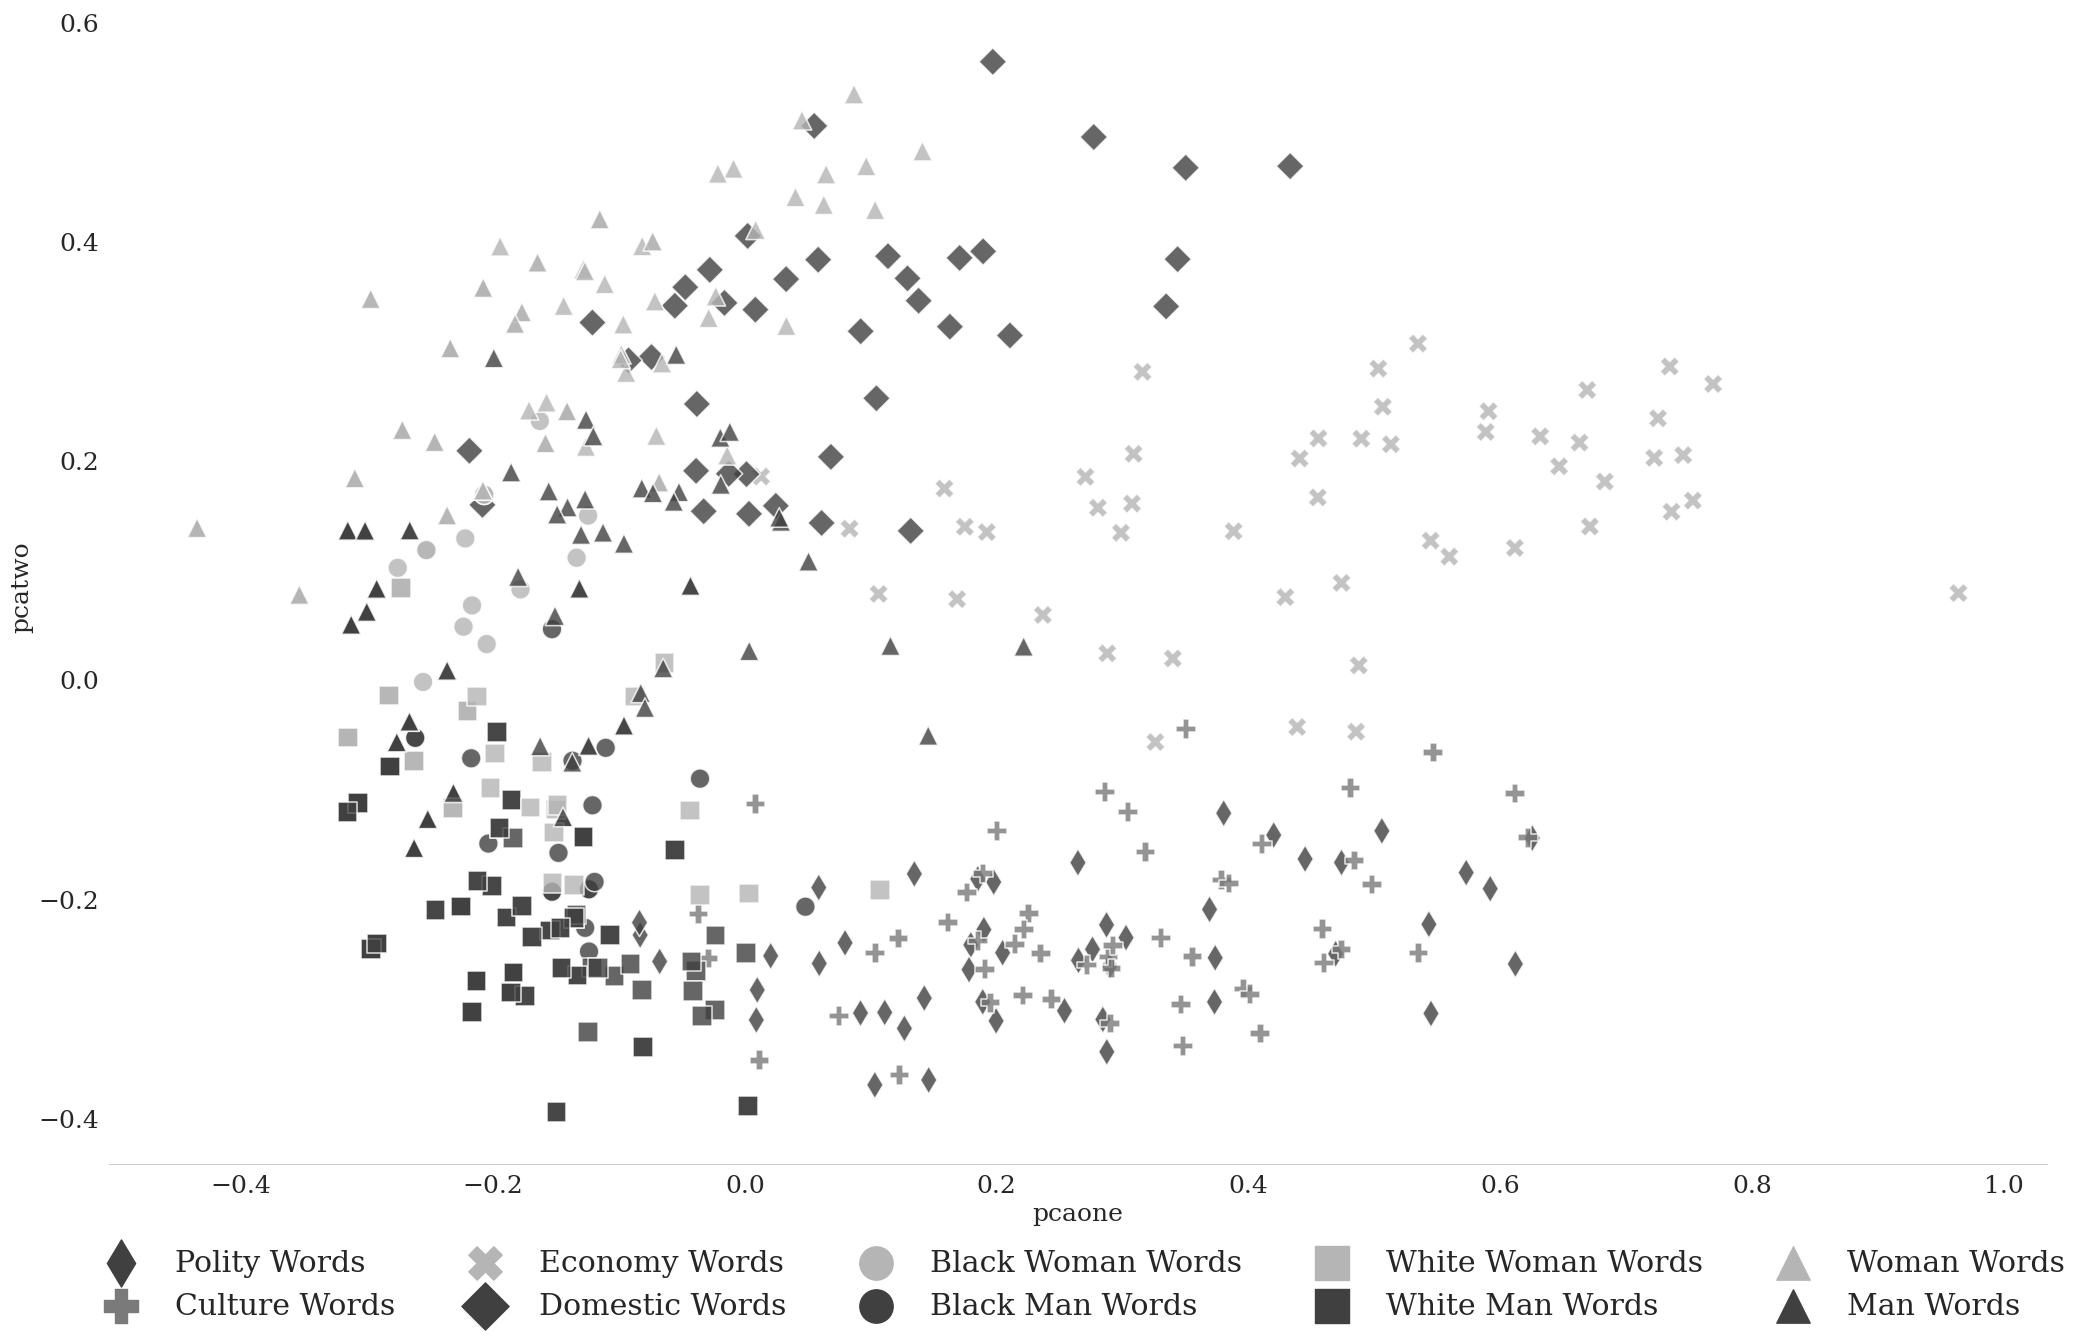

In [9]:
sns.set_style("whitegrid", {'axes.grid' : False})

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}


matplotlib.rc('font', **font)

#palette = sns.color_palette("Greys_r", 4) + [sns.color_palette("Greys_r",4)[2]] + [sns.color_palette("Greys_r",4)[0]] + [sns.color_palette("Greys_r",4)[2]] + [sns.color_palette("Greys_r",4)[0]] + [sns.color_palette("Greys_r",4)[2]]

palette = [sns.color_palette("Greys_r",4)[0]] + [sns.color_palette("Greys_r",4)[1]] + [sns.color_palette("Greys_r",4)[2]] + [sns.color_palette("Greys_r",4)[0]] + [sns.color_palette("Greys_r",4)[2]] + [sns.color_palette("Greys_r",4)[0]] + [sns.color_palette("Greys_r",4)[2]] + [sns.color_palette("Greys_r",4)[0]] + [sns.color_palette("Greys_r",4)[2]]


plt.figure(figsize=(25,15))
fig = sns.scatterplot(
    x="pcaone",
    y="pcatwo",
    hue="",
    style='',
    palette=palette,
    data=df_mds_ppsk,
    hue_order=['Polity Words', 'Culture Words', 'Economy Words', 'Domestic Words', 
               'Black Woman Words', 'Black Man Words', 'White Woman Words', 'White Man Words',
              'Woman Words', 'Man Words'],
    markers=['d','s','X','D','^','o', 'P', 'o', 's', '^'],
    legend="full",
    alpha=0.8,
    s=200
)



fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)

'''
# add annotations one by one with a loop
for line in range(0,df_mds_ppsk.shape[0]):
     fig.text(df_mds_ppsk.pcaone[line], 
             df_mds_ppsk.pcatwo[line], 
             df_mds_ppsk.index[line], 
             horizontalalignment='center', 
             size='small', 
             color='gray', 
             weight='normal')
             
'''
        
fig.legend(loc='upper center', 
            bbox_to_anchor=(0.5, -0.05), 
            ncol=5,
            fontsize='large',
            markerscale=4,
            frameon=False,
            )

# Figure 2. Distribution of words closest to four social institutions along pcatwo and the average distance from pcatwo for two social categories

In [10]:
blackman_ave_pcaone = df_mds_ppsk.groupby('').mean().loc['Black Man Words']['pcaone']
whiteman_ave_pcaone = df_mds_ppsk.groupby('').mean().loc['White Man Words']['pcaone']
blackwoman_ave_pcaone = df_mds_ppsk.groupby('').mean().loc['Black Woman Words']['pcaone']
whitewoman_ave_pcaone = df_mds_ppsk.groupby('').mean().loc['White Woman Words']['pcaone']
WOMAN_ave_pcaone = df_mds_ppsk.groupby('').mean().loc['Woman Words']['pcaone']
MAN_ave_pcaone = df_mds_ppsk.groupby('').mean().loc['Man Words']['pcaone']

blackman_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['Black Man Words']['pcatwo']
whiteman_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['White Man Words']['pcatwo']
blackwoman_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['Black Woman Words']['pcatwo']
whitewoman_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['White Woman Words']['pcatwo']
WOMAN_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['Woman Words']['pcatwo']
MAN_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['Man Words']['pcatwo']

culture_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['Culture Words']['pcatwo']
economy_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['Economy Words']['pcatwo']
polity_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['Polity Words']['pcatwo']
domestic_ave_pcatwo = df_mds_ppsk.groupby('').mean().loc['Domestic Words']['pcatwo']


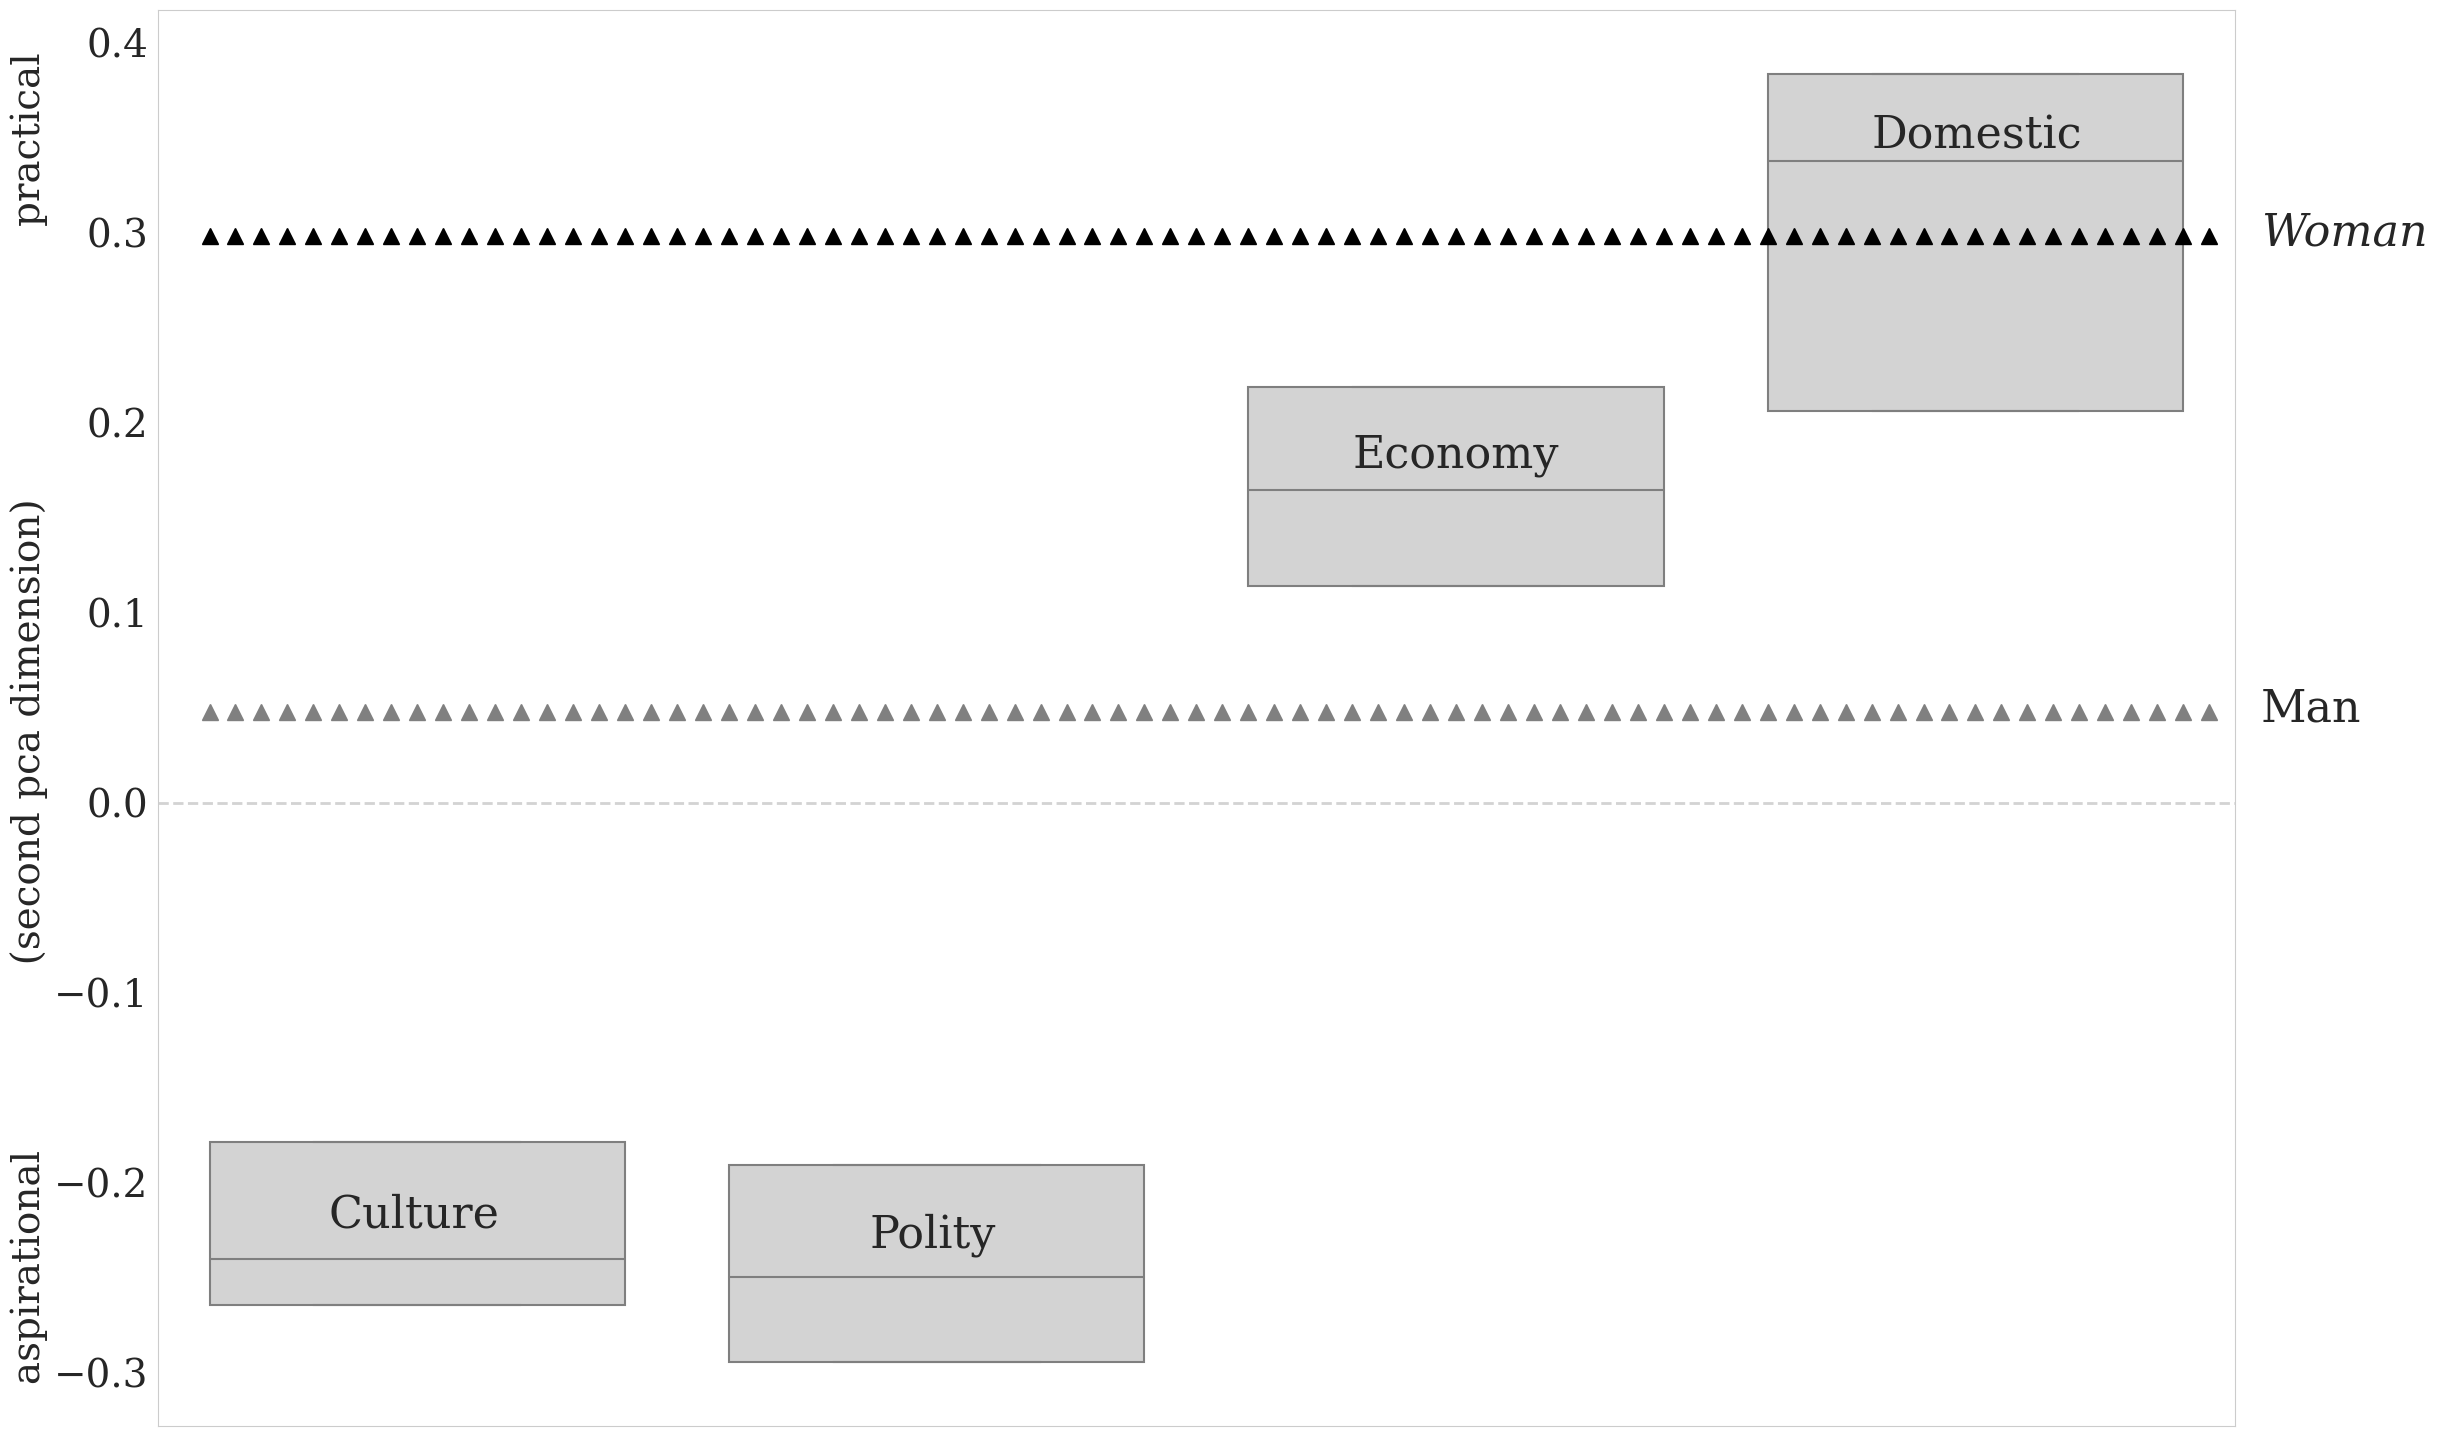

In [11]:
sns.set_style("whitegrid", {'axes.grid' : False})

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

df_women = vp_df[vp_df['']!='Polity Words']

fig = plt.figure(figsize=(25,15))
sns.boxplot(x = '', y = 'pcatwo', 
            data = vp_df, 
            whis=0, 
            showfliers=False, 
            color = 'lightgrey',
           order = ['Culture Words', 'Polity Words', 'Economy Words','Domestic Words',])

plt.axhline(0, linewidth = 2, linestyle = 'dashed', color = 'lightgrey')


for num in np.arange(-0.4, 3.5, 0.05):
    plt.plot(num, WOMAN_ave_pcatwo, marker = '^', markersize=11, color = 'black')

for num in np.arange(-0.4, 3.5, 0.05):
    plt.plot(num, MAN_ave_pcatwo, marker = '^', markersize=11, color = 'grey')
    

plt.ylabel('aspirational               (second pca dimension)                      practical',
          fontsize = 28
          )

plt.text(3.55, WOMAN_ave_pcatwo-0.005, "Woman", fontsize = 32, fontstyle = 'italic')
plt.text(3.55, MAN_ave_pcatwo-0.005, "Man", fontsize = 32)

plt.text(-0.17, culture_ave_pcatwo, "Culture", fontsize = 32)
plt.text(1.8, economy_ave_pcatwo+0.02, "Economy", fontsize = 32)
plt.text(2.8, domestic_ave_pcatwo+0.03, "Domestic", fontsize = 32)
plt.text(0.87, polity_ave_pcatwo+0.01, "Polity", fontsize = 32)


#plt.yticks([])
plt.xticks([])

plt.xlim(-0.5)
plt.tight_layout()

plt.show()

# Figure 3. Distribution of words closest to four social institutions along pcatwo and the average distance from pcatwo for four intersecting social categories

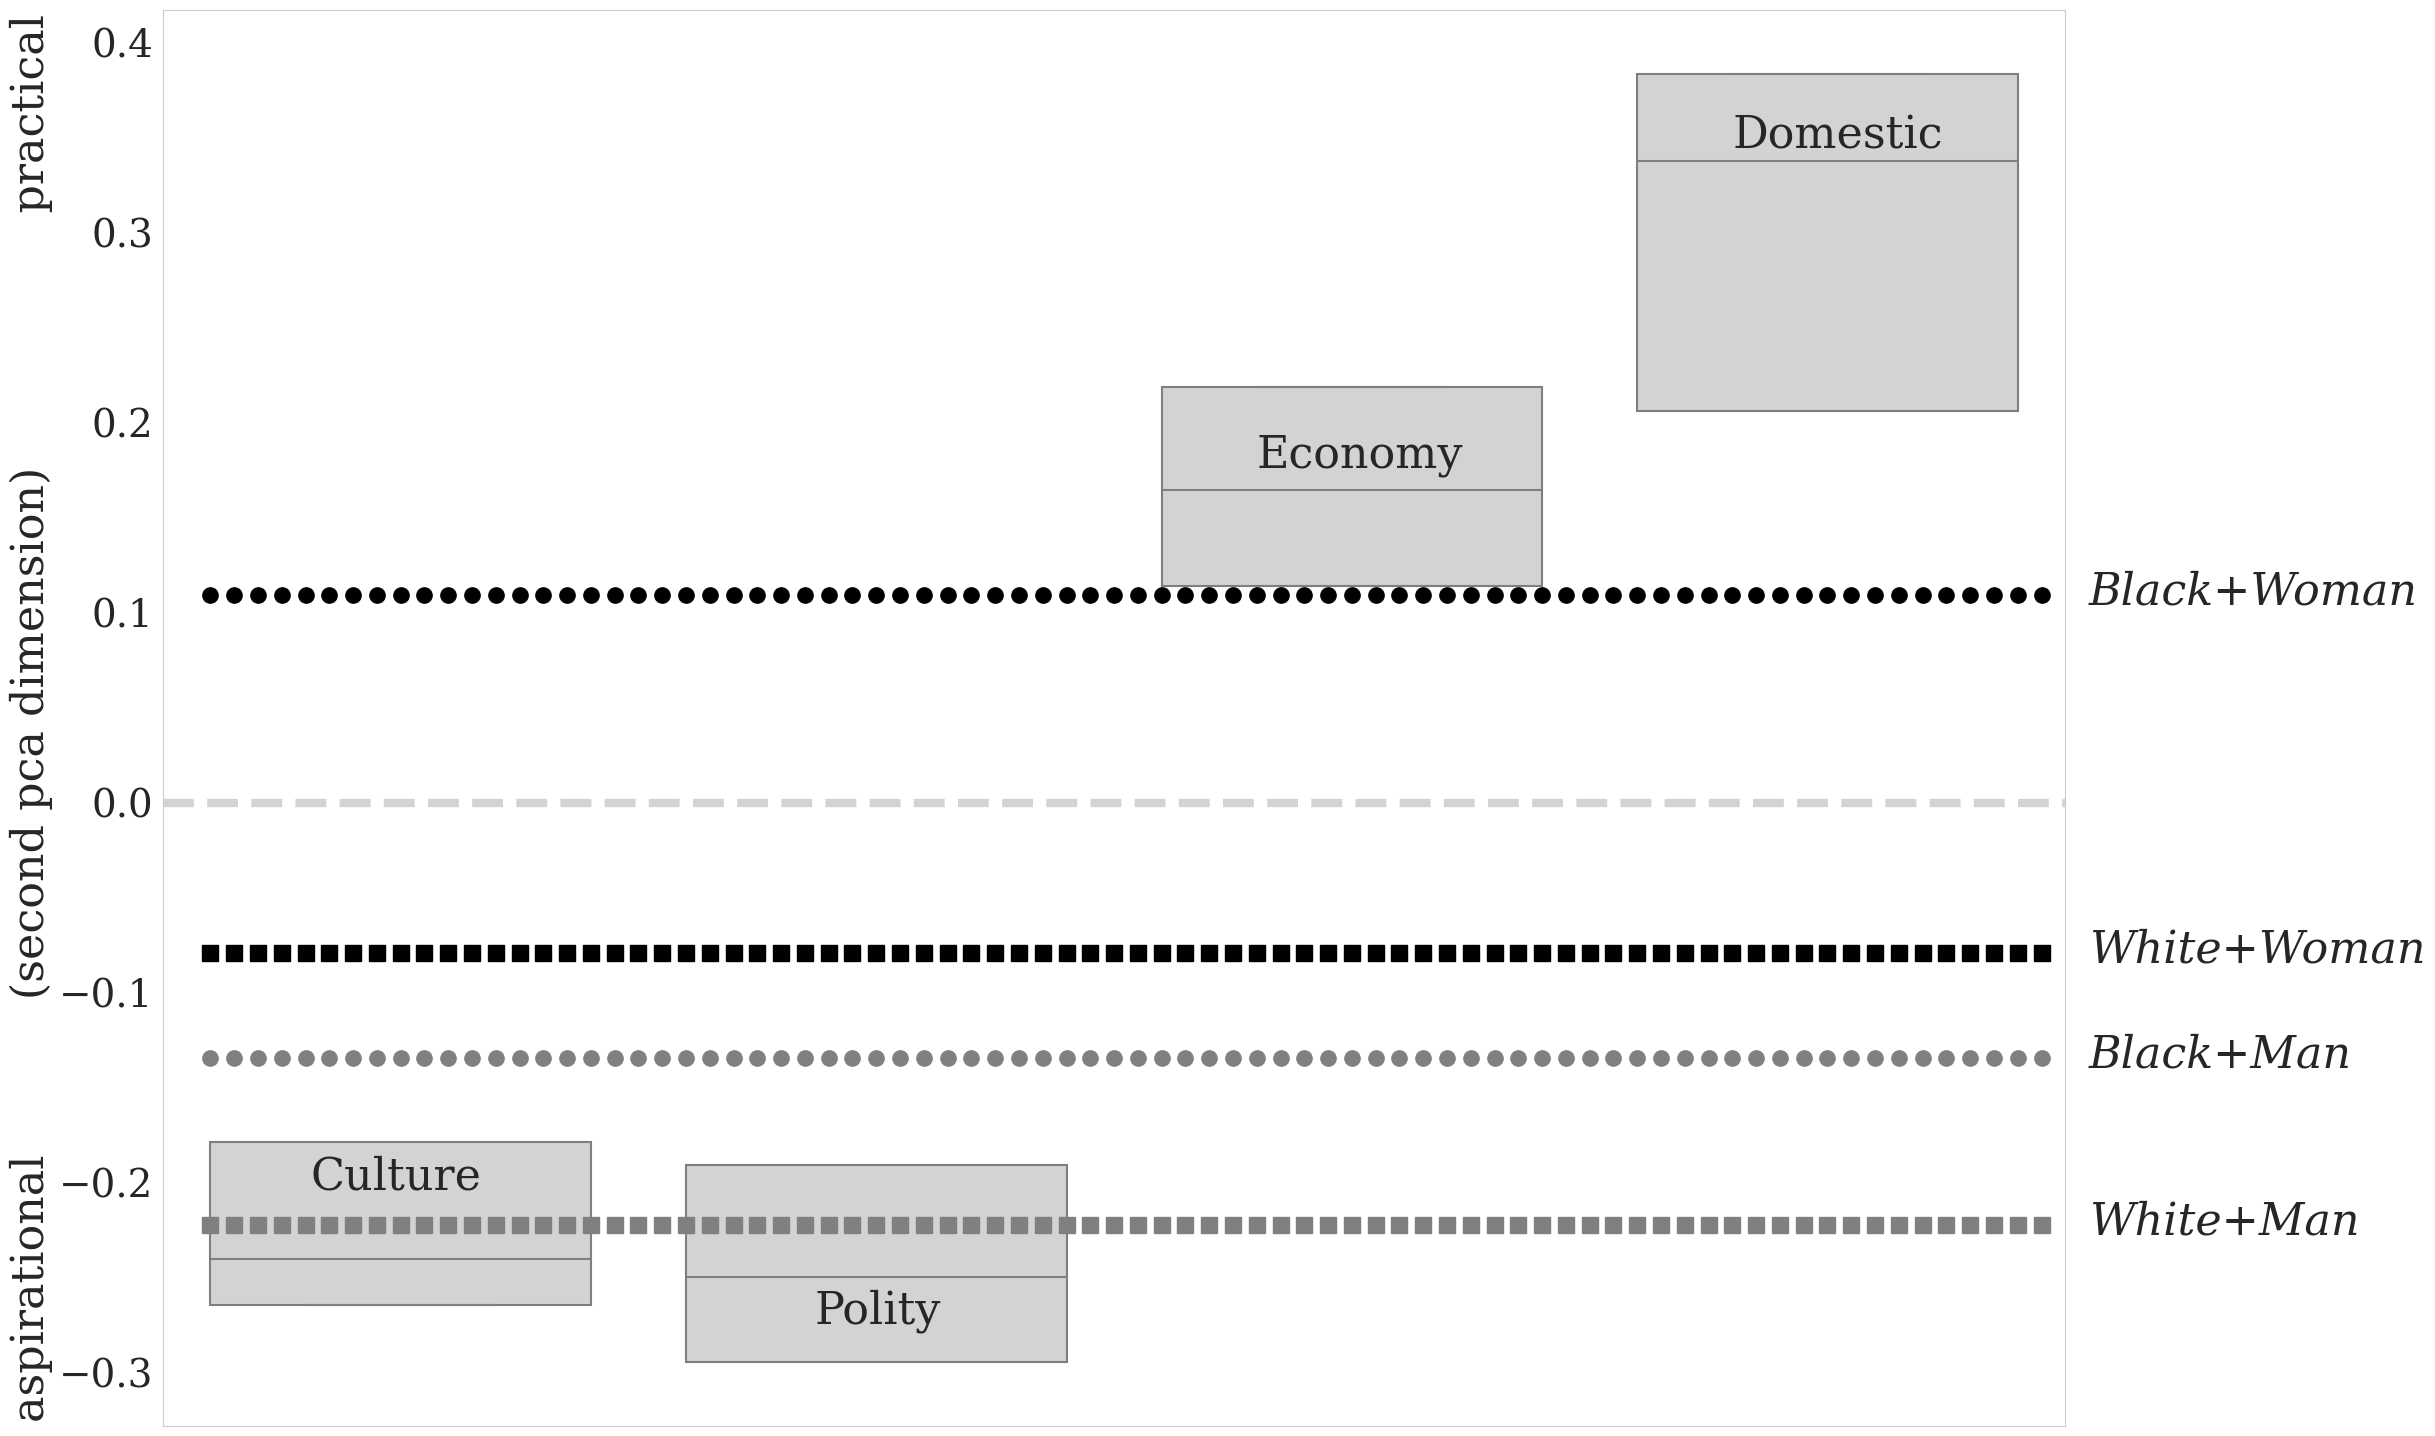

In [12]:
sns.set_style("whitegrid", {'axes.grid' : False})

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

df_women = vp_df[vp_df['']!='Polity Words']

fig = plt.figure(figsize=(25,15))
sns.boxplot(x = '', y = 'pcatwo', 
            data = vp_df, 
            whis=0, 
            showfliers=False, 
            color = 'lightgrey',
           order = ['Culture Words', 'Polity Words', 'Economy Words','Domestic Words',])

plt.axhline(0, linewidth = 6, linestyle = 'dashed', color = 'lightgrey')


for num in np.arange(-0.4, 3.5, 0.05):
    plt.plot(num, whitewoman_ave_pcatwo, marker = 's', markersize=11, color = 'black')

for num in np.arange(-0.4, 3.5, 0.05):    
    plt.plot(num, blackwoman_ave_pcatwo, marker = 'o', markersize=11, color = 'black')

for num in np.arange(-0.4, 3.5, 0.05):
    plt.plot(num, whiteman_ave_pcatwo, marker = 's', markersize=11, color = 'grey')
    
for num in np.arange(-0.4, 3.5, 0.05):
    plt.plot(num, blackman_ave_pcatwo, marker = 'o', markersize=11, color = 'grey')#


plt.ylabel('aspirational           (second pca dimension)                  practical',
          fontsize = 32
          )

plt.text(3.55, blackman_ave_pcatwo-0.005, "Black+Man", fontsize = 32, fontstyle = 'italic')
plt.text(3.55, blackwoman_ave_pcatwo-0.005, "Black+Woman", fontsize = 32, fontstyle = 'italic')
plt.text(3.55, whiteman_ave_pcatwo-0.005, "White+Man", fontsize = 32, fontstyle = 'italic')
plt.text(3.55, whitewoman_ave_pcatwo-0.005, "White+Woman", fontsize = 32, fontstyle = 'italic')

plt.text(-0.19, culture_ave_pcatwo+0.02, "Culture", fontsize = 32)
plt.text(1.8, economy_ave_pcatwo+0.02, "Economy", fontsize = 32)
plt.text(2.8, domestic_ave_pcatwo+0.03, "Domestic", fontsize = 32)
plt.text(0.87, polity_ave_pcatwo-0.03, "Polity", fontsize = 32)


plt.xticks([])

plt.xlim(-0.5)
plt.tight_layout()

plt.show()
